<a href="https://colab.research.google.com/github/LucasPequenoSterzeck/Machine_Learning_LPS/blob/main/SGDR_Regressor_teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utilizano o SGDR Regressor

Variante dos metodos de regressão.

<img src='https://programming-review.com/wp-content/uploads/2020/04/scikit-learn.jpg' width='900'>

NOTA: Regressão SGD localizada no quadrante superior da direita.

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Loading data_set


df = pd.read_csv(r'https://raw.githubusercontent.com/LucasPequenoSterzeck/Machine_Learning_LPS/main/EURUSD_2022_d.csv', sep=',', header=1, index_col=False)



df.drop(columns=['Change(%)'], inplace=True)
df['med_5'] = df.Close.rolling(5).mean()
df.fechamento = df.Close.shift(-1)
df.dropna(inplace=True)
print(df.shape)
display(df.head())

df_v = df[-15:]
df = df[:-15]

df.dtypes

(278, 7)


<ipython-input-9-4845c9a0a706>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.fechamento = df.Close.shift(-1)


,Date,Open,High,Low,Close,Change(Pips),med_5
4,12/23/2022 00:00,1.05917,1.06330,1.05866,1.06205,28.8,1.063878
5,12/22/2022 00:00,1.06031,1.06592,1.05729,1.05978,-5.3,1.062618
6,12/21/2022 00:00,1.06184,1.06457,1.05904,1.06038,-14.6,1.061464
7,12/20/2022 00:00,1.06038,1.06588,1.05791,1.06244,20.6,1.061702
8,12/19/2022 00:00,1.05839,1.06576,1.05757,1.06065,22.6,1.061060


Date             object
Open            float64
High            float64
Low             float64
Close           float64
Change(Pips)    float64
med_5           float64
dtype: object

In [ ]:
X = df.drop(df[['Date','Close']], axis=1)
y = df.Close.values

scaler = MinMaxScaler().fit(X)
features_scale = scaler.transform(X)

xtrain, xtest, ytrain, ytest=train_test_split(features_scale, y, test_size=0.15)

## Testes

SGDRegressor(learning_rate='adaptive', loss='epsilon_insensitive')
SGDRegressor(eta0=1.1)
R-squared: -0.22007769578469505 /// 2ª opção: 0.9966019079099673
Acurácia da regressão SGDR: -61.50 /// 2ª opção: 99.46


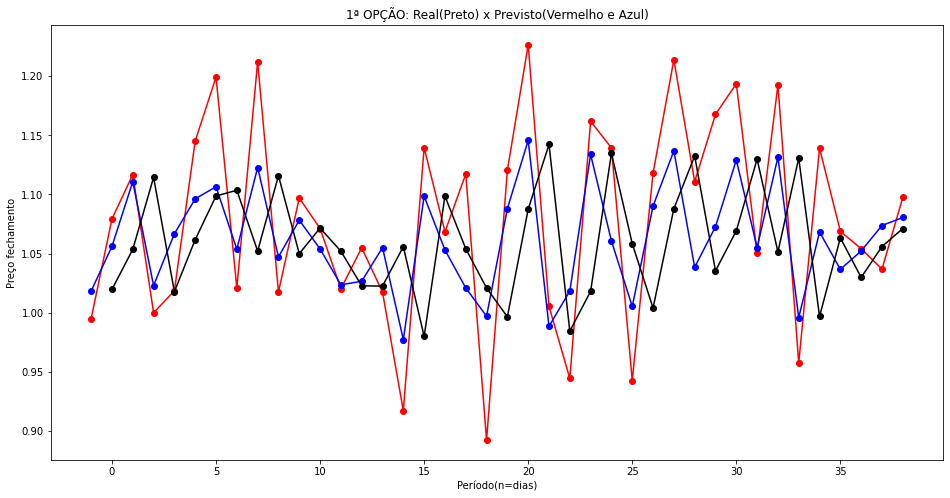

In [ ]:
sgdr = SGDRegressor(loss='epsilon_insensitive', learning_rate='adaptive')
sgdr2 = SGDRegressor(loss='squared_error', learning_rate='invscaling', eta0=1.1)
print(sgdr)
print(sgdr2)

##################

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

sgdr.fit(xtest, ytest)
pred = sgdr.predict(xtest)
score = sgdr.score(xtrain, ytrain)

sgdr2.fit(xtest, ytest)
pred2 = sgdr2.predict(xtest)
score2 = sgdr2.score(xtrain, ytrain)

print(f"R-squared: {score} /// 2ª opção: {score2}")
cd = r2_score(ytest, pred)
cd2 = r2_score(ytest, pred2)
print(f'Acurácia da regressão SGDR: {cd * 100:.2f} /// 2ª opção: {cd2 * 100:.2f}')

###################

plt.figure(figsize=(16,8))
plt.title('1ª OPÇÃO: Real(Preto) x Previsto(Vermelho e Azul)')
plt.plot([i for i in range(1-2,len(ytest)+1-2)], pred,  c='red', marker='o')
plt.plot([i for i in range(1-2,len(ytest)+1-2)], pred2,  c='blue', marker='o')
plt.plot([i for i in range(0,len(ytest[:-1]))], ytest[:-1],c='black', marker='o')
plt.xlabel('Período(n=dias)')
plt.ylabel('Preço fechamento')
plt.show()


In [ ]:
X_v = df_v.drop(df_v[['Date','Close']], axis=1)
y_v = df_v.Close.values

features_scale_v = scaler.transform(X_v)

features_scale_v

array([[0.90099963, 0.89457237, 0.9078615 , 0.44733242, 0.93124771],
       [0.87849468, 0.89528509, 0.89418017, 0.5373461 , 0.92553362],
       [0.92842252, 0.91990132, 0.89407493, 0.17428181, 0.91758657],
       [0.90810926, 0.92631579, 0.91859609, 0.53296854, 0.91810187],
       [0.89014807, 0.89276316, 0.88728689, 0.5255814 , 0.91439172],
       [0.90303095, 0.90625   , 0.90412545, 0.36060192, 0.91119687],
       [0.91650184, 0.9035636 , 0.90738792, 0.36662107, 0.91219311],
       [0.90848346, 0.90614035, 0.91001894, 0.49192886, 0.92121656],
       [0.93521142, 0.91809211, 0.91722795, 0.29165527, 0.91692241],
       [0.89383653, 0.92302632, 0.90901915, 0.63666211, 0.92236167],
       [0.90335169, 0.89221491, 0.89028626, 0.3871409 , 0.92354113],
       [0.91259956, 0.9002193 , 0.91091349, 0.38604651, 0.92351823],
       [0.91286684, 0.91156798, 0.91096611, 0.4500684 , 0.9227052 ],
       [0.92302347, 0.91935307, 0.92612082, 0.37783858, 0.92370145],
       [0.9323248 , 0.92593202, 0.

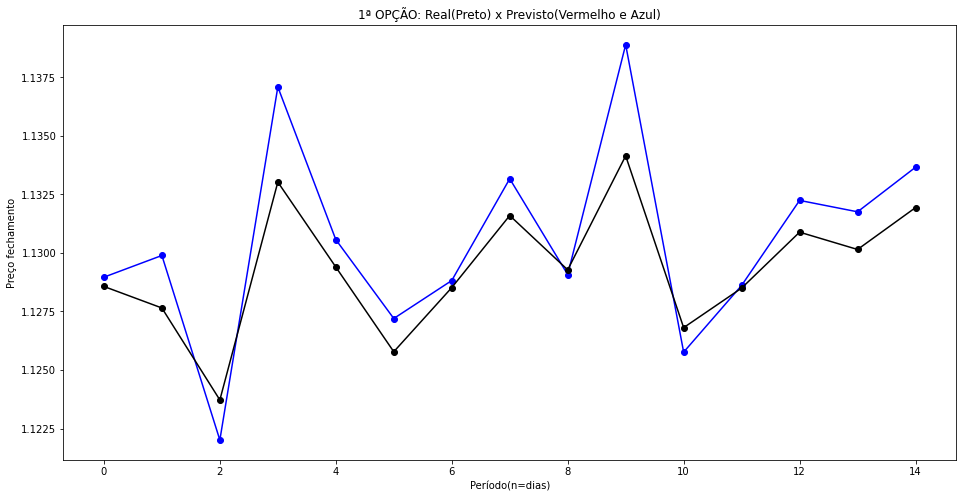

In [ ]:
pred = sgdr.predict(features_scale_v)

pred2 = sgdr2.predict(features_scale_v)



###################

plt.figure(figsize=(16,8))
plt.title('1ª OPÇÃO: Real(Preto) x Previsto(Vermelho e Azul)')
#plt.plot([i for i in range(1-2,len(y_v)+1-2)], pred,  c='red', marker='o')
plt.plot([i for i in range(0,len(y_v))], pred2,  c='blue', marker='o')
plt.plot([i for i in range(0,len(df_v.Close.values))], df_v.Close.values,c='black', marker='o')
plt.xlabel('Período(n=dias)')
plt.ylabel('Preço fechamento')
plt.show()

In [ ]:

df_va = pd.DataFrame(zip(df_v.Date.values,df_v.Close.values,pred,pred2,df_v.Open.values), columns=['Data','Fechamento','Previ01','Previ02','Open'])

df_va['Pv01_Real'] = df_va.eval('((Previ01 - Fechamento)-1)*100')
df_va['Pv02_Real'] = df_va.eval('((Previ02 - Fechamento)-1)*100')

co = 0
for r in df_va.iterrows():
  co += 1
  if co > 1:
    if r[1][1] > ant_r[1][1] and r[1][3] > ant_r[1][3]: print('WIN')
    elif r[1][1] < ant_r[1][1] and r[1][3] < ant_r[1][3]: print('WIN')
    else: print('LOSS')


  ant_r = r
df_va

LOSS
WIN
WIN
WIN
WIN
WIN
WIN
WIN
WIN
WIN
WIN
WIN
WIN
WIN


,Data,Fechamento,Previ01,Previ02,Open,Pv01_Real,Pv02_Real
0,12/21/2021 00:00,1.12857,1.201888,1.128967,1.12781,-92.668163,-99.960325
1,12/20/2021 00:00,1.12765,1.220554,1.129894,1.12360,-90.709560,-99.775643
2,12/17/2021 00:00,1.12372,1.137069,1.122007,1.13294,-98.665131,-100.171280
3,12/16/2021 00:00,1.13303,1.227468,1.137095,1.12914,-90.556159,-99.593486
4,12/15/2021 00:00,1.12940,1.217517,1.130572,1.12578,-91.188298,-99.882809
5,12/14/2021 00:00,1.12578,1.180313,1.127200,1.12819,-94.546694,-99.857970
6,12/13/2021 00:00,1.12852,1.183352,1.128822,1.13071,-94.516754,-99.969755
7,12/10/2021 00:00,1.13160,1.214699,1.133172,1.12921,-91.690137,-99.842815
8,12/09/2021 00:00,1.12928,1.169077,1.129079,1.13421,-96.020258,-100.020140
9,12/08/2021 00:00,1.13415,1.250865,1.138901,1.12647,-88.328516,-99.524881
